In [ ]:
!curl -L https://github.com/gardenappl/uni/blob/main/semesterm1/nn/lecture7/fonts.zip?raw=true -o fonts.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  152M  100  152M    0     0  22.0M      0  0:00:06  0:00:06 --:--:-- 36.2M


In [ ]:
!rm *.csv
!unzip fonts.zip

rm: cannot remove '*.csv': No such file or directory
Archive:  fonts.zip
  inflating: AGENCY.csv              
  inflating: ARIAL.csv               
  inflating: BAITI.csv               
  inflating: BANKGOTHIC.csv          
  inflating: BASKERVILLE.csv         
  inflating: BAUHAUS.csv             
  inflating: BELL.csv                
  inflating: BERLIN.csv              
  inflating: BERNARD.csv             
  inflating: BITSTREAMVERA.csv       
  inflating: BLACKADDER.csv          
  inflating: BODONI.csv              
  inflating: BOOK.csv                
  inflating: BOOKMAN.csv             
  inflating: BRADLEY.csv             
  inflating: BRITANNIC.csv           
  inflating: BROADWAY.csv            
  inflating: BRUSH.csv               
  inflating: BUXTON.csv              
  inflating: CAARD.csv               
  inflating: CALIBRI.csv             
  inflating: CALIFORNIAN.csv         
  inflating: CALISTO.csv             
  inflating: CAMBRIA.csv             
  inflating: CA

Приберемо optical character recognition, це не є шрифтом.

In [ ]:
!rm OCR*.csv

In [ ]:
import glob
import pandas as pd
files = glob.glob("*.csv")
df = pd.concat([pd.read_csv(f) for f in files])
print(df)

         font fontVariant  m_label  strength  italic  orientation  m_top  \
0       CAARD    CAARD-LN     8776       0.4       0          0.0     47   
1       CAARD    CAARD-LN     8729       0.4       0          0.0     52   
2       CAARD    CAARD-LN     8722       0.4       0          0.0     55   
3       CAARD    CAARD-LN     8482       0.4       0          0.0     34   
4       CAARD    CAARD-LN     8364       0.4       0          0.0     32   
..        ...         ...      ...       ...     ...          ...    ...   
907  ELEPHANT    ELEPHANT       37       0.7       1          0.0     35   
908  ELEPHANT    ELEPHANT       36       0.7       1          0.0     33   
909  ELEPHANT    ELEPHANT       35       0.7       1          0.0     37   
910  ELEPHANT    ELEPHANT       34       0.7       1          0.0     36   
911  ELEPHANT    ELEPHANT       33       0.7       1          0.0     37   

     m_left  originalH  originalW  ...  r19c10  r19c11  r19c12  r19c13  \
0        20  

In [ ]:
df.head()

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,CAARD,CAARD-LN,8776,0.4,0,0.0,47,20,22,27,...,24,24,118,255,255,255,255,204,13,1
1,CAARD,CAARD-LN,8729,0.4,0,0.0,52,21,6,7,...,255,255,255,255,255,255,255,37,1,1
2,CAARD,CAARD-LN,8722,0.4,0,0.0,55,20,7,27,...,255,255,255,255,255,255,255,255,133,1
3,CAARD,CAARD-LN,8482,0.4,0,0.0,34,20,11,16,...,255,255,255,192,1,1,192,255,255,255
4,CAARD,CAARD-LN,8364,0.4,0,0.0,32,20,49,31,...,255,255,255,255,255,202,175,255,225,84


In [ ]:
((df['h'] != 20) & (df['h'] != 20)).any()

False

In [ ]:
grouped_font = df.groupby('font')

In [ ]:
pd.set_option('display.max_rows', 200)

In [ ]:
grouped_font['m_label'].nunique()

font
AGENCY               251
ARIAL               3098
BAITI                412
BANKGOTHIC           280
BASKERVILLE          239
BAUHAUS              238
BELL                 239
BERLIN               252
BERNARD              239
BITSTREAMVERA         85
BLACKADDER           238
BODONI               256
BOOK                 667
BOOKMAN              668
BRADLEY              245
BRITANNIC            238
BROADWAY             239
BRUSH                239
BUXTON               583
CAARD                212
CALIBRI             2384
CALIFORNIAN          251
CALISTO              249
CAMBRIA             3208
CANDARA              756
CASTELLAR            264
CENTAUR              239
CENTURY              669
CHILLER              238
CITYBLUEPRINT        466
COMIC                597
COMMERCIALSCRIPT     280
COMPLEX              410
CONSOLAS            2285
CONSTANTIA           755
COOPER               239
COPPERPLATE          239
CORBEL               756
COUNTRYBLUEPRINT     460
COURIER             

In [ ]:
unique_fonts = grouped_font.filter(lambda sf: sf['m_label'].nunique() < 100)

In [ ]:
unique_fonts.groupby('font').count()

,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,h,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
font,,,,,,,,,,,,,,,,,,,,,
BITSTREAMVERA,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,...,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296
CREDITCARD,29449,29449,29449,29449,29449,29449,29449,29449,29449,29449,...,29449,29449,29449,29449,29449,29449,29449,29449,29449,29449
E13B,24070,24070,24070,24070,24070,24070,24070,24070,24070,24070,...,24070,24070,24070,24070,24070,24070,24070,24070,24070,24070
HANDPRINT,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,...,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000
MONEY,7553,7553,7553,7553,7553,7553,7553,7553,7553,7553,...,7553,7553,7553,7553,7553,7553,7553,7553,7553,7553
NUMERICS,13704,13704,13704,13704,13704,13704,13704,13704,13704,13704,...,13704,13704,13704,13704,13704,13704,13704,13704,13704,13704
VIN,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005,...,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005


In [ ]:
normal_fonts = grouped_font.filter(lambda sf: sf['m_label'].nunique() > 100)

In [ ]:
del unique_fonts

In [ ]:
normal_fonts['font'].nunique()

144

Маємо 144 "не унікальних" шрифтів: таких що мають більше 100 символів

In [ ]:
fonts_per_label = normal_fonts.groupby('m_label')['font'].nunique()

In [ ]:
common_labels = fonts_per_label[fonts_per_label == 144]

In [ ]:
common_labels

m_label
33     144
34     144
35     144
36     144
37     144
38     144
39     144
40     144
41     144
42     144
43     144
44     144
45     144
46     144
47     144
48     144
49     144
50     144
51     144
52     144
53     144
54     144
55     144
56     144
57     144
58     144
59     144
60     144
61     144
62     144
63     144
64     144
65     144
66     144
67     144
68     144
69     144
70     144
71     144
72     144
73     144
74     144
75     144
76     144
77     144
78     144
79     144
80     144
81     144
82     144
83     144
84     144
85     144
86     144
87     144
88     144
89     144
90     144
91     144
92     144
93     144
94     144
95     144
96     144
97     144
98     144
99     144
100    144
101    144
102    144
103    144
104    144
105    144
106    144
107    144
108    144
109    144
110    144
111    144
112    144
113    144
114    144
115    144
116    144
117    144
118    144
119    144
120    144
121    144
122    144
12

In [ ]:
common_labels.index

Int64Index([ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
            ...
            242, 243, 244, 245, 246, 247, 248, 249, 250, 251],
           dtype='int64', name='m_label', length=149)

In [ ]:
new_df = normal_fonts[normal_fonts['m_label'].isin(common_labels.index)]

Прибрали символи, що не містяться в якомусь "не унікальному" шрифті

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153227 entries, 34 to 911
Columns: 412 entries, font to r19c19
dtypes: float64(2), int64(408), object(2)
memory usage: 482.8+ MB


In [ ]:
pixel_cols = [f'r{x}c{y}' for x in range(20) for y in range(20)]

In [ ]:
new_df = new_df[pixel_cols + ['m_label', 'font']]

In [ ]:
new_df.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19,m_label,font
34,1,1,1,1,1,1,1,86,171,231,...,243,171,110,61,1,1,1,1,251,CAARD
35,1,1,1,1,1,1,1,1,1,61,...,243,171,110,61,1,1,1,1,250,CAARD
36,1,1,1,1,1,49,219,255,255,255,...,243,171,110,61,1,1,1,1,249,CAARD
37,1,1,1,1,1,11,100,147,193,255,...,162,100,11,1,1,1,1,1,248,CAARD
38,1,1,1,1,1,1,1,49,221,255,...,1,1,1,1,1,1,1,1,247,CAARD


In [ ]:
new_df.to_csv('new_fonts.csv')

In [ ]:
pixels = new_df[pixel_cols].to_numpy()

In [ ]:
pixels

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
pixels = pixels / 255

In [ ]:
pixels[0]

array([0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
       0.00392157, 0.00392157, 0.3372549 , 0.67058824, 0.90588235,
       0.90588235, 0.67058824, 0.3372549 , 0.00392157, 0.00392157,
       0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
       0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
       0.43137255, 0.85882353, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.85882353, 0.67058824,
       0.23921569, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
       0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.71764706,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.71764706, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
       0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
       0.43137255, 0.67058824, 0.61960784, 0.3372549 , 0.09803922,
       0.00392157, 0.19215686, 0.61960784, 0.67058824, 0.67058

In [ ]:
labels = new_df['m_label'].to_numpy()
fonts = new_df['font'].to_numpy()

In [ ]:
import tensorflow as tf
import keras.layers as L
import keras.models as K

In [ ]:
def get_category_encoding(array, max_tokens=None):
  index = L.StringLookup(max_tokens=max_tokens)
  index.adapt(array)

  # Encode the integer indices.
  encoder = L.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply one-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature)), index

In [ ]:
encode, index = get_category_encoding(fonts, 144)

In [ ]:
encode('ARIAL')

<tf.Tensor: shape=(144,), dtype=float32, numpy=
array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
import numpy as np

In [ ]:
categories = [encode(font).numpy() for font in fonts]

In [ ]:
categories[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
images = pixels.reshape((-1, 20, 20))

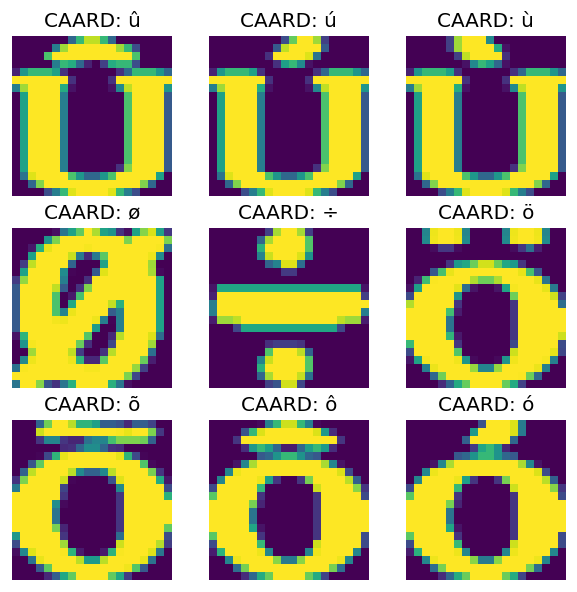

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)
for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(images[n])
  char = chr(labels[n])
  font = fonts[n]
  plt.title(f"{font}: {char}")
  plt.axis('off')

In [ ]:
categories_numpy = np.array(categories)

In [ ]:
categories_numpy[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_val, y_train, y_val = train_test_split(images, categories_numpy, test_size=0.1, shuffle=True)

In [ ]:
model = K.Sequential([
  L.Conv2D(64, 3, input_shape=(20,20,1), activation='relu'),
  L.Conv2D(32, 3, activation='relu'),
  L.Conv2D(16, 3, activation='relu'),
  L.Flatten(),
  L.Dense(144, activation='sigmoid')
])


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_133 (Conv2D)         (None, 18, 18, 64)        640       
                                                                 
 conv2d_134 (Conv2D)         (None, 16, 16, 32)        18464     
                                                                 
 conv2d_135 (Conv2D)         (None, 14, 14, 16)        4624      
                                                                 
 flatten_43 (Flatten)        (None, 3136)              0         
                                                                 
 dense_50 (Dense)            (None, 144)               451728    
                                                                 
Total params: 475,456
Trainable params: 475,456
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(
    x=x_train, 
    y=y_train,
    validation_data=(x_val, y_val),
    epochs=10, 
    verbose=1, 
    batch_size=10
  )

Epoch 1/10
13791/13791 [==============================] - 379s 27ms/step - loss: 3.3830 - accuracy: 0.2503 - val_loss: 2.9171 - val_accuracy: 0.3303
Epoch 2/10
13791/13791 [==============================] - 373s 27ms/step - loss: 2.5458 - accuracy: 0.3936 - val_loss: 2.6645 - val_accuracy: 0.3855
Epoch 3/10
13791/13791 [==============================] - 376s 27ms/step - loss: 2.1669 - accuracy: 0.4648 - val_loss: 2.5667 - val_accuracy: 0.4168
Epoch 4/10
13791/13791 [==============================] - 375s 27ms/step - loss: 1.9310 - accuracy: 0.5118 - val_loss: 2.5725 - val_accuracy: 0.4207
Epoch 5/10
13791/13791 [==============================] - 375s 27ms/step - loss: 1.7658 - accuracy: 0.5463 - val_loss: 2.6059 - val_accuracy: 0.4215
Epoch 6/10
 6313/13791 [============>.................] - ETA: 3:18 - loss: 1.5696 - accuracy: 0.5898

KeyboardInterrupt: ignored

In [ ]:
model.save("model.h5")

Бачимо overfitting, але все ж продовжимо навчання

In [ ]:
model_continue = K.load_model("model.h5")

In [ ]:
history2 = model_continue.fit(
    x=x_train, 
    y=y_train,
    validation_data=(x_val, y_val),
    epochs=10, 
    verbose=1, 
    batch_size=10
  )

Epoch 1/10
13791/13791 [==============================] - 347s 25ms/step - loss: 1.7175 - accuracy: 0.5646 - val_loss: 1.8003 - val_accuracy: 0.5474
Epoch 2/10
13791/13791 [==============================] - 354s 26ms/step - loss: 1.5881 - accuracy: 0.5872 - val_loss: 1.9180 - val_accuracy: 0.5235
Epoch 3/10
13791/13791 [==============================] - 356s 26ms/step - loss: 1.4960 - accuracy: 0.6069 - val_loss: 2.0401 - val_accuracy: 0.5098
Epoch 4/10
13791/13791 [==============================] - 348s 25ms/step - loss: 1.4214 - accuracy: 0.6215 - val_loss: 2.1875 - val_accuracy: 0.4903
Epoch 5/10
13791/13791 [==============================] - 347s 25ms/step - loss: 1.3605 - accuracy: 0.6352 - val_loss: 2.2956 - val_accuracy: 0.4852
Epoch 6/10
13791/13791 [==============================] - 352s 25ms/step - loss: 1.3099 - accuracy: 0.6472 - val_loss: 2.3584 - val_accuracy: 0.4728
Epoch 7/10
13791/13791 [==============================] - 357s 26ms/step - loss: 1.2645 - accuracy: 0.6563

Низьку точність можна пояснити наявністю символів-дублікатів, тобто таких які ідентичні або майже ідентичні у кількох шрифтах. Проте якщо розпізнавати слова, а не окремі літери, то зі збільшенням кількості вхідних символів можна з більшою впевненістю правильно розпізнати шрифт.

В порівнянні з минулою лабораторною, навчання трохи складніше, оскільки не маємо унікальних символів, які би "допомогли" мережі (легко вгадати до якого шрифту належить символ 文 якщо він надається тільки одним шрифтом)